Data Description:
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

Domain:Banking

Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

Learning Outcomes:

Exploratory Data Analysis
Preparing the data to train a model
Training and making predictions using a classification model
Model evaluation
Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

Steps and tasks:

Read the column description and ensure you understand each attribute well
Study the data distribution in each attribute, share your findings
Get the target column distribution.
Split the data into training and test set in the ratio of 70:30 respectively
Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans
Print the confusion matrix for all the above models
Give your reasoning on which is the best model in this case and why it performs better?
References:

Data analytics use cases in Banking
Machine Learning for Financial Marketing


In [95]:
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [97]:
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [98]:
print(df.dtypes)

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object


In [99]:
print(df.isnull().sum())

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


In [100]:
print(df.isnull().any(axis=0))

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool


In [101]:
correlation_matrix = df.corr()
threshold = 0.3

print("significant correlations: ")
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        # print(abs(correlation_matrix.iloc[i,j]))
        if abs(correlation_matrix.iloc[i,j]) > threshold:
            colname1 = correlation_matrix.columns[i]
            colname2 = correlation_matrix.columns[j]
            correlation_value = correlation_matrix.iloc[i,j]
            correlation_type = "positive" if correlation_value > 0 else "negative"
            print(f" columns '{colname1}' and {colname2}' have a {correlation_type} of {correlation_value:.2f}")

significant correlations: 
 columns 'Experience' and Age' have a positive of 0.99
 columns 'CCAvg' and Income' have a positive of 0.65
 columns 'Personal Loan' and Income' have a positive of 0.50
 columns 'Personal Loan' and CCAvg' have a positive of 0.37
 columns 'CD Account' and Personal Loan' have a positive of 0.32
 columns 'CD Account' and Securities Account' have a positive of 0.32


#### Recursive Feature Elemination


In [102]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [103]:
#Selecting features based on Correlation Threshold
threshold = 0.5
# Get the list of columns
columns = correlation_matrix.columns

# Create a set to keep track of features with significant correlations
selected_features = set()

# Iterate through the matrix to find correlations exceeding the threshold
for i in range(len(columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname1 = columns[i]
            colname2 = columns[j]
            correlation_value = correlation_matrix.iloc[i, j]
            print(f"Columns '{colname1}' and '{colname2}' have a correlation of {correlation_value:.2f}")
            selected_features.add(colname1)
            selected_features.add(colname2)

# Convert the set to a list for further use
selected_features = list(selected_features)
print("Selected Features based on Correlation Threshold:")
print(selected_features)


Columns 'Experience' and 'Age' have a correlation of 0.99
Columns 'CCAvg' and 'Income' have a correlation of 0.65
Columns 'Personal Loan' and 'Income' have a correlation of 0.50
Selected Features based on Correlation Threshold:
['Experience', 'Age', 'Income', 'Personal Loan', 'CCAvg']


In [104]:
y = df['Personal Loan']
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [105]:
# Define a list of columns to remove
columns_to_remove = ['Personal Loan']

# Remove the specified columns from the list of selected features
selected_features = [feature for feature in selected_features if feature not in columns_to_remove]

In [106]:
selected_features

['Experience', 'Age', 'Income', 'CCAvg']

In [107]:
X = df[selected_features]

In [108]:
X

,Experience,Age,Income,CCAvg
0,1,25,49,1.6
1,19,45,34,1.5
2,15,39,11,1.0
3,9,35,100,2.7
4,8,35,45,1.0
...,...,...,...,...
4995,3,29,40,1.9
4996,4,30,15,0.4
4997,39,63,24,0.3
4998,40,65,49,0.5


In [109]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#### Split data


In [110]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Scale data


In [111]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Select model and fit


In [112]:
# Initialize and fit the Logistic Regression model
model = LogisticRegression(max_iter=1000, solver='lbfgs')  # Increase max_iter as needed
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

#### evaluate model


In [113]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.9006666666666666


### Confusion Matrix


In [114]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [115]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1302   41]
 [ 108   49]]


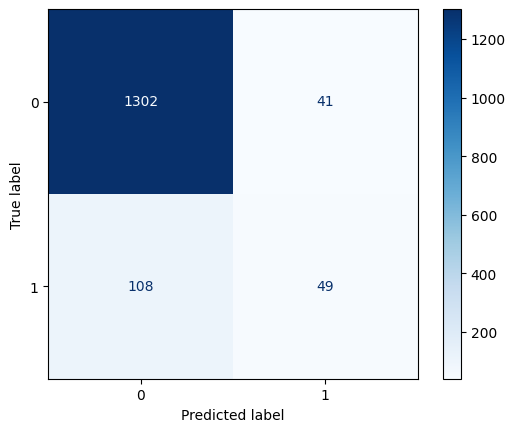

In [116]:
# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Prediction Application

The prediction application is a simple application that uses the trained model to make predictions on new, unseen


In [117]:
import joblib

In [118]:
# Save the model and scaler
joblib.dump(model, 'logistic_regression_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [122]:
# ['Experience', 'Age', 'Income', 'CCAvg']

def input_customer_details():
    print("Enter new customer details:")
    age = int(input("Age: "))
    experience = int(input("Experience: "))
    income = float(input("Income: "))
    ccavg = float(input("CCAvg: "))
    return pd.DataFrame([[age, experience, income, ccavg]], columns=selected_features)


In [121]:
def load_model_and_predict(new_data):
    model = joblib.load('logistic_regression_model.joblib')
    scaler = joblib.load('scaler.joblib')
    new_data_scaled = scaler.transform(new_data)
    prediction = model.predict(new_data_scaled)
    probability = model.predict_proba(new_data_scaled)
    return prediction, probability


In [124]:
# Main function to execute the prediction
def main():
    new_data = input_customer_details()
    prediction, probability = load_model_and_predict(new_data)
    print(f"Prediction: {prediction[0]}")
    print(f"Probability: {probability[0]}")

# Run the main function
if __name__ == "__main__":
    selected_features = ['Experience', 'Age', 'Income', 'CCAvg'] # Ensure this matches your selected features
    main()

Enter new customer details:
Prediction: 0
Probability: [0.99777543 0.00222457]
